In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 44.5MB/s]
100% 1.06G/1.06G [00:29<00:00, 39.4MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [26]:

model = Sequential()
        
model.add(Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu",input_shape=(256,256,3)))
model.add(Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
            
model.add(Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
            
model.add(Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
            
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
            
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
            
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_29 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 128)    

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 408s 642ms/step - loss: 0.9019 - accuracy: 0.5319 - val_loss: 0.7157 - val_accuracy: 0.5122
Epoch 2/10
625/625 [==============================] - 403s 645ms/step - loss: 0.6859 - accuracy: 0.5442 - val_loss: 0.6929 - val_accuracy: 0.5226
Epoch 3/10
625/625 [==============================] - 390s 624ms/step - loss: 0.6622 - accuracy: 0.5765 - val_loss: 0.6642 - val_accuracy: 0.5744
Epoch 4/10
625/625 [==============================] - 404s 646ms/step - loss: 0.6309 - accuracy: 0.6216 - val_loss: 0.6682 - val_accuracy: 0.6020
Epoch 5/10
625/625 [==============================] - 389s 621ms/step - loss: 0.6272 - accuracy: 0.6205 - val_loss: 0.7016 - val_accuracy: 0.6094
Epoch 6/10
625/625 [==============================] - 389s 622ms/step - loss: 0.5832 - accuracy: 0.6736 - val_loss: 0.5615 - val_accuracy: 0.6938
Epoch 7/10
625/625 [==============================] - 390s 623ms/step - loss: 0.5286 - accuracy: 0.7325 - val_loss: 0.5939 -

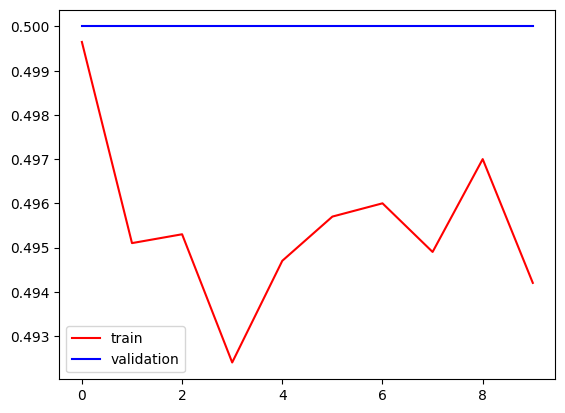

In [24]:
#without BatchNormalization() and Dropout
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

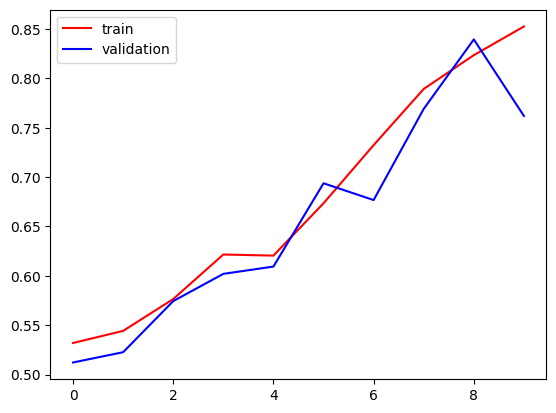

In [30]:
#with BatchNormalization() and Dropout
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()